<a href="https://colab.research.google.com/github/AV-Gorshkov/Python_netology/blob/main/PY_%D0%9E%D1%81%D0%BD%D0%BE%D0%B2%D1%8B_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание:
1. Загрузить данные из датасета FPS_hw_x_df_x_taxi.xlsx.
2. Исследовать данные и построить графики плотности распределения дистанций поездок для классов Economy и Comfort.
3. Проверить гипотезу: «На дальние поездки пользователи предпочитают Economy-классу более комфортные условия поездки в Comfort-классе.
4. Сделать выводы по результатам проверки.

In [ ]:
import pandas as pd
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

Загрузка и просмотр данных

In [ ]:
df = pd.read_excel('ДЗ_Путь аналитика_Дата_Сет.xlsx')
df.head(15)

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,22.967881,53.113626,Premium,1
1,436,3,19.439948,5.781342,Delivery,1
2,1327,6,19.816643,16.200071,Delivery,0
3,2013,2,19.123837,13.731643,Delivery,0
4,2241,6,23.164958,20.436380,Premium,1
5,2601,4,18.355521,46.301291,Premium,0
6,2710,4,23.825352,2.142234,Comfort,1
7,2911,7,19.491440,42.587786,Premium,1
8,2948,6,18.996947,67.540478,Premium,1
9,3013,2,15.692942,33.417278,Delivery,1


Формирование выборки по классу "Comfort".Просмотр описательной статистики

In [ ]:
df_comfort=df[df['offer_class_group' ]== 'Comfort']
df_comfort.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,465289.002000,4.106000,22.943699,29.758910,0.486000
std,272443.226582,1.968378,4.842951,17.644643,0.500305
min,2710.000000,1.000000,15.496198,0.024259,0.000000
25%,232141.250000,2.000000,19.430402,16.345205,0.000000
50%,475479.000000,4.000000,21.704980,28.078273,0.000000
75%,697329.750000,6.000000,25.120825,41.300650,1.000000
max,918656.000000,7.000000,50.206056,81.507022,1.000000


In [ ]:
# Расчет статистических показателей
print (f"""Расчет статистических показателей:\n
Макс = {df_comfort['distance_km'].max()}\n
Мин = {df_comfort['distance_km'].min()}\n
Ср.значение = {st.mean(df_comfort['distance_km'])}\n
Кол-во = {df_comfort['distance_km'].count()}\n
Станд. откл. = {st.stdev(df_comfort['distance_km'])}\n
Персентиль:\n{df_comfort['distance_km'].quantile([0, 0.25, 0.50, 0.75, 1])}
  """)

Расчет статистических показателей:

Макс = 81.50702248866502

Мин = 0.02425920721393027

Ср.значение = 29.758909792274043

Кол-во = 500

Станд. откл. = 17.644643077451175

Персентиль:
0.00     0.024259
0.25    16.345205
0.50    28.078273
0.75    41.300650
1.00    81.507022
Name: distance_km, dtype: float64
  


Визуализация данных для выборки Comfort

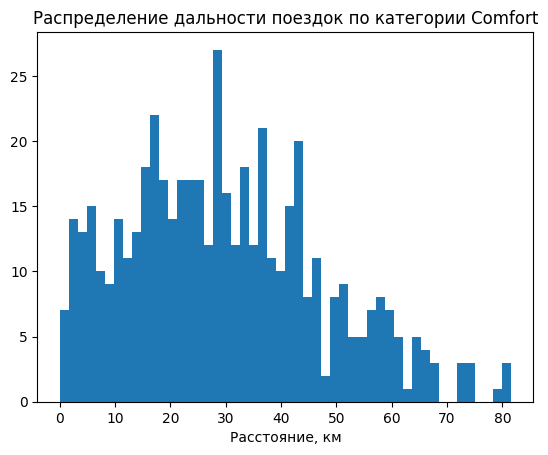

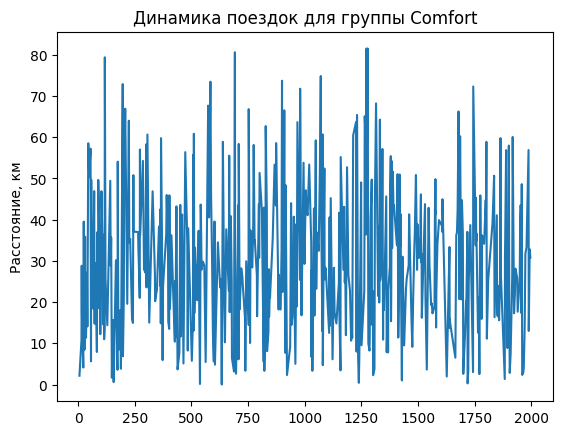

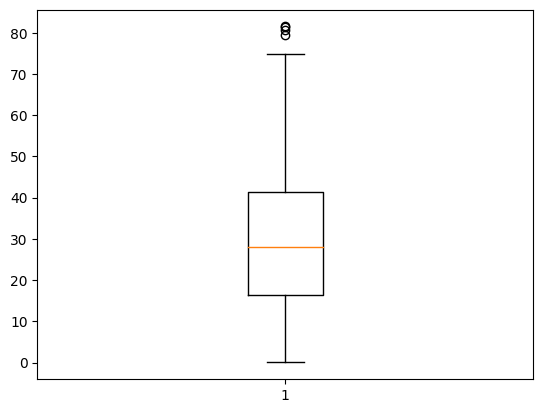

In [ ]:
# Гистограмма плотности распределения
plt.hist(df_comfort['distance_km'], 50)
plt.title('Распределение дальности поездок по категории Comfort')
plt.xlabel('Расстояние, км')
plt.show()

# График динамики значений
plt.plot(df_comfort['distance_km'])
plt.title('Динамика поездок для группы Comfort')
plt.ylabel('Расстояние, км')
plt.show()

# Boxplot
plt.boxplot(df_comfort['distance_km'])
plt.show()

Распределение выборки "Comfort" имеет около нормальное распределение (логарифмическое).
В наборе данных имеется несколько точек вброса: аномально большие значения в районе 80 км.


Формирование выборки по классу "Economy".Просмотр описательной статистики

In [ ]:
df_economy=df[df['offer_class_group' ]== 'Economy']
df_economy.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,500.00000,500.000000,500.000000,500.000000,500.000000
mean,463448.91200,3.896000,22.165311,26.283117,0.422000
std,274029.66119,1.989246,4.063839,17.016153,0.494373
min,3845.00000,1.000000,14.899553,0.089947,0.000000
25%,226962.50000,2.000000,19.006174,13.372229,0.000000
50%,455884.50000,4.000000,21.257715,23.798183,0.000000
75%,721415.75000,6.000000,24.402652,36.845287,1.000000
max,919196.00000,7.000000,39.185553,90.516618,1.000000


In [ ]:
# Расчет статистических показателей
print (f"""Расчет статистических показателей:\n
Макс = {df_economy['distance_km'].max()}\n
Мин = {df_economy['distance_km'].min()}\n
Ср.значение = {st.mean(df_economy['distance_km'])}\n
Кол-во = {df_economy['distance_km'].count()}\n
Станд. откл. = {st.stdev(df_economy['distance_km'])}\n
Персентиль:\n{df_economy['distance_km'].quantile([0, 0.25, 0.50, 0.75, 1])}
  """)

Расчет статистических показателей:

Макс = 90.5166181048858

Мин = 0.08994740093195475

Ср.значение = 26.283116862179483

Кол-во = 500

Станд. откл. = 17.01615268667912

Персентиль:
0.00     0.089947
0.25    13.372229
0.50    23.798183
0.75    36.845287
1.00    90.516618
Name: distance_km, dtype: float64
  


Визуализация данных для выборки Economy

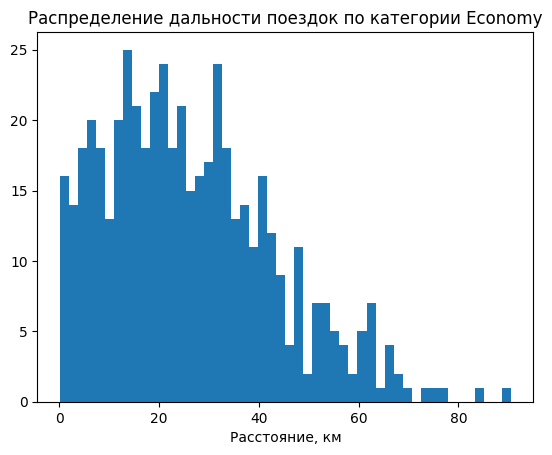

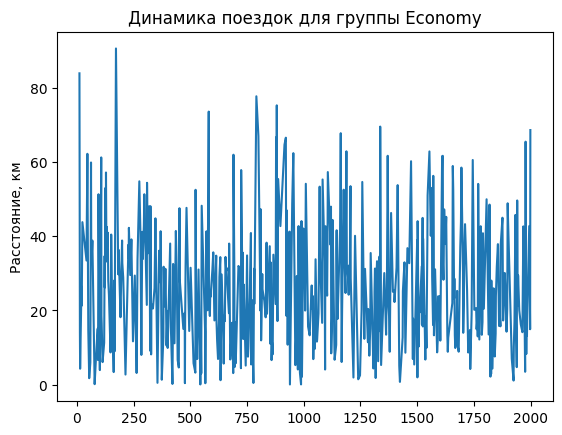

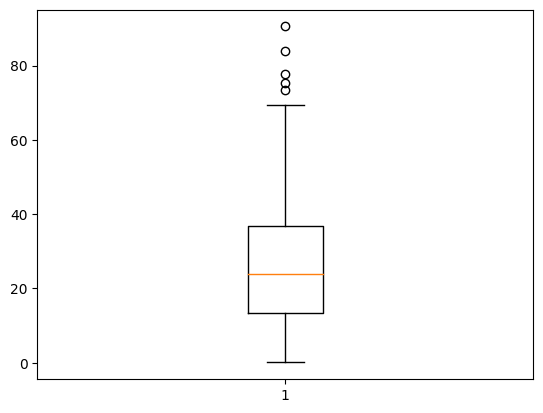

In [ ]:
# Гистограмма плотности распределения
plt.hist(df_economy['distance_km'], 50)
plt.title('Распределение дальности поездок по категории Economy')
plt.xlabel('Расстояние, км')
plt.show()

# График динамики значений
plt.plot(df_economy['distance_km'])
plt.title('Динамика поездок для группы Economy')
plt.ylabel('Расстояние, км')
plt.show()

# Boxplot
plt.boxplot(df_economy['distance_km'])
plt.show()

Распределение выборки имеет около нормальное распределение (логарифмическое).
В наборе данных имеется несколько точек вброса в диапазоне от 73км до 90км

Проверка гипотез.

На дальние поездки пользователи предпочитают Economy-классу более комфортные условия поездки в Comfort-классе.

H0 - выборки значимо не отличаются, дальность поездок не зависит от класса.

H1 - дальность поездок зависти от класса, выборки значимо отличаются


In [ ]:
# Формирование, проверка выборок

print('Выборкки имеют одинаковую длинну: ', len(df_economy) == len(df_comfort))
print('Выборка Economy', len(df_economy))
print('Выборка Comfort', len(df_comfort))

Выборкки имеют одинаковую длинну:  True
Выборка Economy 500
Выборка Comfort 500


Визуализация доверительных интервалов

<ipython-input-74-6e6b639b1c83>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_economy['distance_km'], 70)
<ipython-input-74-6e6b639b1c83>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comfort['distance_km'], 70)


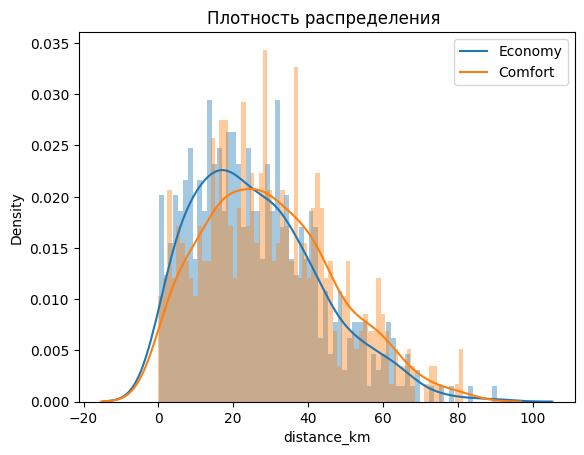

In [ ]:
sns.distplot(df_economy['distance_km'], 70)
sns.distplot(df_comfort['distance_km'], 70)
plt.title('Плотность распределения ')
plt.legend(['Economy', 'Comfort'])
plt.show()

Проведение Т-Теста (t-критерий Стьюдента)

In [ ]:
alpha = 0.025   # Уровень значимости
A = 'Comfort'
B = 'Economy'

result_AB = ttest_ind(df_comfort['distance_km'], df_economy['distance_km'])
print('p-value: %.8f' % result_AB.pvalue)

if (result_AB.pvalue < alpha):
    print(f' Отвергаем нулевую гипотезу\n Выборки {A} и {B} значимо отличаются')
else:
    print(f' Не отвергаем нулевую гипотезу\n Выборки {A} и {B} значимо не отличаются')


p-value: 0.00156751
 Отвергаем нулевую гипотезу
 Выборки Comfort и Economy значимо отличаются


p-value: 0.00156751
Отвергаем нулевую гипотезу. Выборки Comfort и Economy значимо отличаются


Проведение теста Манна — Уитни (U-критерий Манна — Уитни)

In [ ]:
A = 'Comfort'
B = 'Economy'

result_AB = mannwhitneyu(df_comfort['distance_km'], df_economy['distance_km'])
print('p-value: %.8f' % result_AB.pvalue)

if (result_AB.pvalue < alpha):
    print(f' Отвергаем нулевую гипотезу\n Выборки {A} и {B} значимо отличаются')
else:
    print(f' Не отвергаем нулевую гипотезу\n Выборки {A} и {B} значимо не отличаются')

p-value: 0.00128491
 Отвергаем нулевую гипотезу
 Выборки Comfort и Economy значимо отличаются


Вывод:
1. Плотность распределения для данных выборок "Economy" и  "Comfort" имеют
около нормальное распределение (логарифмическое), с выраженными "хвостами"
направленными водну сторону.
2. Для проверки гипотезы проведем Т-тест для односторонней области.
Принимаем гипотезу H1. Выборки значимо отличаются, дальность поездки зависит от класса.